# Anomaly Detection - BE

This notebook is presenting our work on the following subject : An aircraft system expert comes to see you (data scientist) with this dataset, and asks you to: *Build an algorithm to detect windows that are abnormal.*

## Import and Load Dataset 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


data = pd.read_csv('data/dataset.csv')

data.head()

,day_cycle_window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,1_1_1,-0.805191,-1.141993,-1.328327,-1.516693,-1.373962,-0.80827,-1.070547,-0.504352,2.807146,0.495528,-1.246737
1,1_1_1,-0.805191,-1.134902,-1.320393,-1.505848,-1.361560,-0.80784,-1.064212,-0.516000,2.894177,0.494467,-1.244472
2,1_1_1,-0.805191,-1.117304,-1.307167,-1.505848,-1.361560,-0.80784,-1.064212,-0.516000,2.981904,0.429370,-1.244472
3,1_1_1,-0.814231,-1.114206,-1.287593,-1.442302,-1.287565,-0.80784,-1.045557,-0.516000,3.063298,0.348056,-1.244472
4,1_1_1,-0.848104,-1.112276,-1.285393,-1.429076,-1.270722,-0.80784,-1.017575,-0.664906,3.049237,0.118828,-1.270237


## Naive approach
  
mean + std + PCA


In [14]:
#data_reduced = data.groupby(['day_cycle_window']).agg(['mean', 'std'])

data_reduced = data.groupby(['day_cycle_window']).mean()
data_reduced.head()


,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
day_cycle_window,,,,,,,,,,,
1_1_1,-1.926141,-2.456284,-2.487394,-2.481230,-2.388674,-1.984092,-2.447148,-1.169837,2.848242,-1.370045,-2.500060
1_1_10,1.204735,1.123558,1.077596,1.128253,1.136183,1.228688,1.199106,1.308412,-0.429810,-0.088168,1.016565
1_1_11,0.742475,0.703459,0.680578,0.740626,0.768269,0.736631,0.755362,0.783155,-0.429810,-0.091129,0.669938
1_1_12,0.300162,0.289058,0.289114,0.342999,0.396993,0.254292,0.324268,0.264819,-0.429810,-0.085217,0.303699
1_1_13,0.140935,0.152487,0.161874,0.200016,0.226986,0.083547,0.170042,0.068720,-0.429810,-0.089727,0.186059


In [21]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)

data_PCA = model.fit_transform(data_reduced)

principal_data_df = pd.DataFrame(data = data_PCA, columns = ['pc1', 'pc2'])
principal_data_df.head()

,pc1,pc2
0,-7.083090,-1.705463
1,3.440946,-0.064432
2,2.218227,-0.028909
3,1.003629,-0.000455
4,0.566042,0.015290


In [26]:
def plotAnomalies2D(df, clf_name, clf):
    """
        df: Pandas DataFrame containing all the points to plot (for features X1 and X2)
        clf_name: String value - name of the outlier detection model
        clf: Scikit Learn model instance - the trained outlier detection model
    """
    plt.figure()
    plt.plot(df['pc1'],df['pc2'], 'o')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.xlim([df['pc1'].min()-3,df['pc1'].max()+3])
    plt.ylim([df['pc2'].min()-3,df['pc2'].max()+3])
    plt.title(clf_name)
    
    if clf_name == 'LOF':
        ypred = clf.fit_predict(df[['pc1','pc2']])
        plt.plot(df['pc1'][ypred==-1],df['pc2'][ypred==-1],'ro')
    else:
        xx, yy = np.meshgrid(np.linspace(df['pc1'].min()-3,df['pc1'].max()+3, 500), np.linspace(df['pc2'].min()-3,df['pc2'].max()+3, 500))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='r')

In [8]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 2 while Y.shape[1] == 11

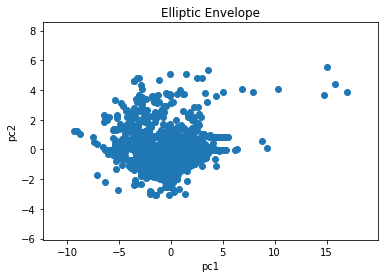

In [27]:
clf_name = 'Elliptic Envelope'

clf = EllipticEnvelope(contamination=0.15)
clf.fit(data_reduced)

plotAnomalies2D(principal_data_df, clf_name, clf)


In [ ]:
clf_name = 'Isolation Forest'

clf = IsolationForest(behaviour='new', n_estimators=100, contamination=0.15)
clf.fit(data_reduced)

In [ ]:
clf_name = 'Local Outlier Factor'

clf = LocalOutlierFactor(n_neighbors=5, contamination=0.15, novelty=True)
clf.fit(data_reduced)

In [ ]:
clf_name = 'One Class SVM'

clf = OneClassSVM(nu=0.15, kernel="rbf", gamma=0.3) # nu corresponds to contamination
clf.fit(data_reduced)